---

# Decision and Regression Trees


**Decision Trees (DTs)** are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

Decision trees tend to be the method of choice for predictive modeling because they are relatively easy to understand and are also very effective. The basic goal of a decision tree is to split a population of data into smaller segments. There are two stages to prediction. The first stage is training the model—this is where the tree is built, tested, and optimized by using an existing collection of data. In the second stage, you actually use the model to predict an unknown outcome.

Decision trees are constructed from only two elements — nodes and branches.



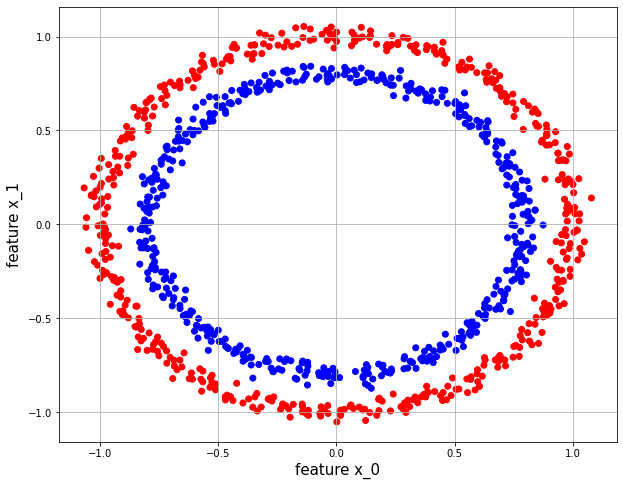

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 

from sklearn.datasets import make_circles

X, y = make_circles(n_samples = 1_000, noise = 0.03, random_state=3)
colors = ["red" if label == 0 else "blue" for label in y]


plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c = colors)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid(True)
plt.show()

---

As with all machine learning tasks, we need split our data into a training and testing subsets. This can be done by calling the ```sklearn.model_selection.train_test_split()``` function. Run the following code cell to create this split and to visualize the training data. 


---

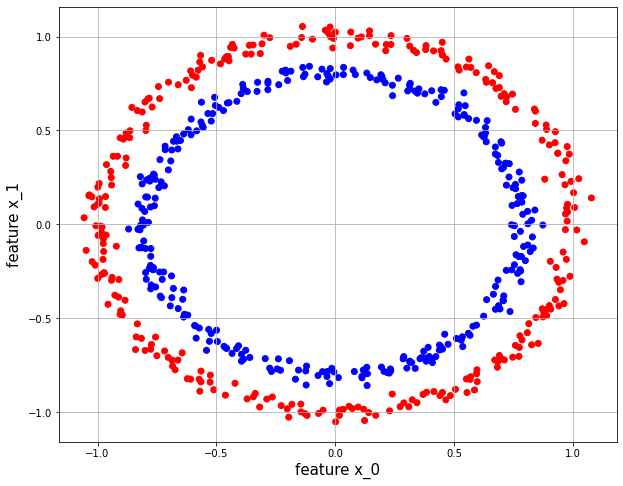

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

c_train = ["red" if label == 0 else "blue" for label in y_train]
c_test = ["red" if label == 0 else "blue" for label in y_test]

plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c = c_train)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

---

Next we instantiate an instance of the ```sklearn.tree.DecisionTreeClassifier``` model. For documentation on this class see think [link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier). Next we train the model by calling the ```fit()``` method. This can be shown by running the following code cell.


---

In [3]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=15, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=42)

---

Now that our model has been trained we can visualize the tree structure of our current model by calling the ```sklearn.tree.plot_tree()``` function. An example of this can be seen by running the following code cell. 


---

|--- x_0 <= -0.83
|   |--- x_0 <= -0.87
|   |   |--- class: 0
|   |--- x_0 >  -0.87
|   |   |--- x_0 <= -0.87
|   |   |   |--- class: 1
|   |   |--- x_0 >  -0.87
|   |   |   |--- class: 0
|--- x_0 >  -0.83
|   |--- x_1 <= 0.84
|   |   |--- x_1 <= -0.82
|   |   |   |--- x_1 <= -0.87
|   |   |   |   |--- class: 0
|   |   |   |--- x_1 >  -0.87
|   |   |   |   |--- x_1 <= -0.85
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- x_1 >  -0.85
|   |   |   |   |   |--- x_0 <= -0.29
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- x_0 >  -0.29
|   |   |   |   |   |   |--- x_0 <= 0.19
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- x_0 >  0.19
|   |   |   |   |   |   |   |--- class: 0
|   |   |--- x_1 >  -0.82
|   |   |   |--- x_0 <= 0.84
|   |   |   |   |--- x_1 <= 0.59
|   |   |   |   |   |--- x_1 <= -0.57
|   |   |   |   |   |   |--- x_0 <= 0.57
|   |   |   |   |   |   |   |--- x_0 <= -0.55
|   |   |   |   |   |   |   |   |--- x_0 <= -0.61
|   |   |   

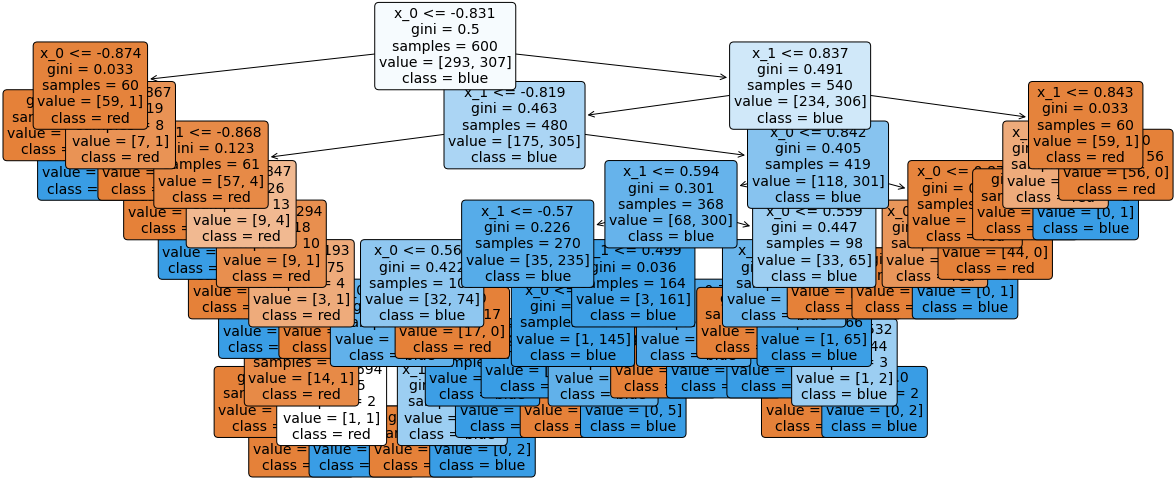

In [4]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text

tree_rules = export_text(decision_tree,
                         feature_names = ["x_0", "x_1"])
print(tree_rules, "\n")


plt.figure(figsize=(20, 8))
a = plot_tree(decision_tree,
                   feature_names = ["x_0", "x_1"],
                   class_names = ["red", "blue"],
                   rounded = True,
                   filled = True, 
                   fontsize=14)
plt.show()

---

The figure above depicts a graph theoretic tree that is used to make predictions. Suppose you would like to make a prediction on a given feature vector $x = [x_0, x_1]^T$. To do this, follow these steps: 

1. Start at the *root node* (depth 0, at the top).
2. If $x_1 \le 0.268$, then you then move down to the root's left child node (depth 1, left), otherwise move down to the root's right child node (depth 1, right). 
3. Repeat the process (illustrated in 2) of moving to successive child nodes according to satifying the boolean condition specified at each parent node until you reach a leaf node (a node with no child nodes). 
4. The predicted class of this leaf node will be the predicted class of our feature vector $x = [x_0, x_1]^T$.

That's it! We can visualize the decision regions generated by our trained decision tree by running the following code cell. 

---

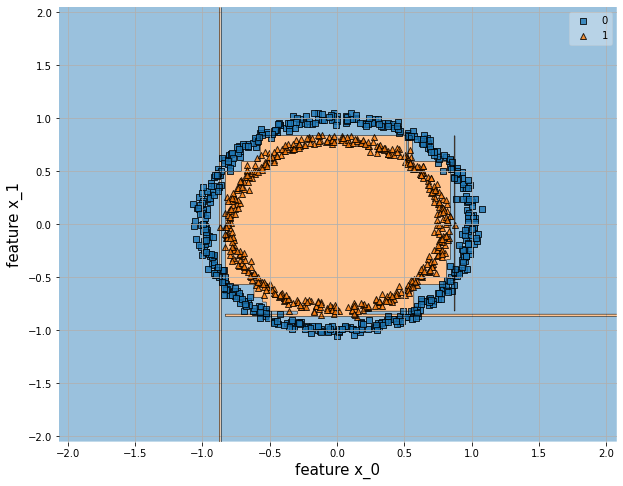

In [5]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = decision_tree)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

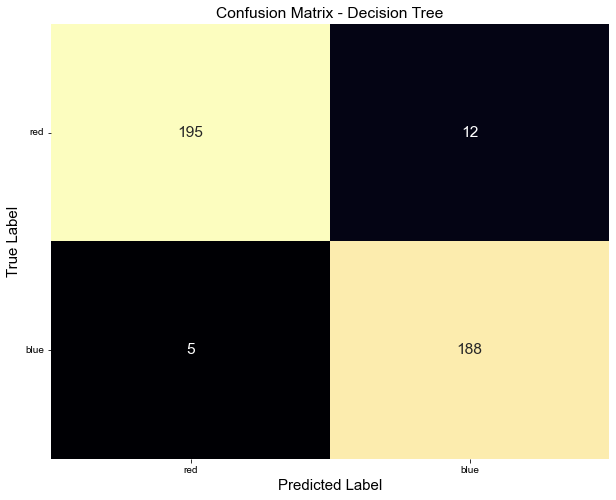

In [6]:
# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# Import metrics from sklearn 
from sklearn import metrics

# Note: visualizing your tree above will be weird after running seaborn
import seaborn as sns

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma", 
            cbar = False)

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["red", "blue"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["red", "blue"], rotation=0)
plt.show()

In [7]:
from sklearn.metrics import classification_report

y_pred = decision_tree.predict(X_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       207
           1       0.94      0.97      0.96       193

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



---

# Regression Trees
In the following cell we load the breast cancer wisconsin dataset. After which we attempt to perform regression on one of the columns of data using a regression tree. 

---

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer


X, y = load_breast_cancer(return_X_y = True)



In [18]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [19]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12)

reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [24]:
from sklearn.metrics import mean_squared_error

reg1 = DecisionTreeRegressor(max_depth=1, random_state = 12)
reg1.fit(X_train, y_train)
y_pred = reg1.predict(X_test)
print(f"MSE reg1: {mean_squared_error(y_test, y_pred)} \n")


reg2 = DecisionTreeRegressor(max_depth=20, random_state = 12)
reg2.fit(X_train, y_train)
y_pred = reg2.predict(X_test)
print(f"MSE reg2: {mean_squared_error(y_test, y_pred)} \n")


MSE reg1: 0.13989953033029986 

MSE reg2: 0.0979020979020979 



In [23]:
reg1 = DecisionTreeRegressor(max_depth=1)
reg1.fit(X_train, y_train)
y_pred = reg1.predict(X_test)
print(f"MSE reg1: {mean_squared_error(y_test, y_pred)} \n")


reg2 = DecisionTreeRegressor(max_depth=2)
reg2.fit(X_train, y_train)
y_pred = reg2.predict(X_test)
print(f"MSE reg2: {mean_squared_error(y_test, y_pred)} \n")

MSE reg1: 0.13989953033029986 

MSE reg2: 0.1047360846615642 

